## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

## Import Data

In [2]:
dataset = r'diabetes.csv'# Path to the csv file
dataset = pd.read_csv(dataset)

In [3]:
type(dataset)

pandas.core.frame.DataFrame

## Eksplorasi Dataset

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# mendapatkan 10 data random
dataset.sample(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
340,1,130,70,13,105,25.9,0.472,22,0
389,3,100,68,23,81,31.6,0.949,28,0
497,2,81,72,15,76,30.1,0.547,25,0
623,0,94,70,27,115,43.5,0.347,21,0
596,0,67,76,0,0,45.3,0.194,46,0
452,0,91,68,32,210,39.9,0.381,25,0
448,0,104,64,37,64,33.6,0.510,22,1
224,1,100,66,15,56,23.6,0.666,26,0
734,2,105,75,0,0,23.3,0.560,53,0
198,4,109,64,44,99,34.8,0.905,26,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset.describe().T.style.background_gradient(cmap='OrRd')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


## Mendeteksi Missing Values

In [9]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Persebaran Data

Having Diebetes:	268
Not Having Diebetes:	500
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


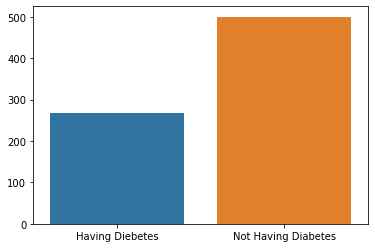

In [10]:
having_diabetes = dataset[dataset["Outcome"]==1]
not_having = dataset[(dataset["Outcome"]==0)]

print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)])

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(dataset),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(dataset),2)) + " %")

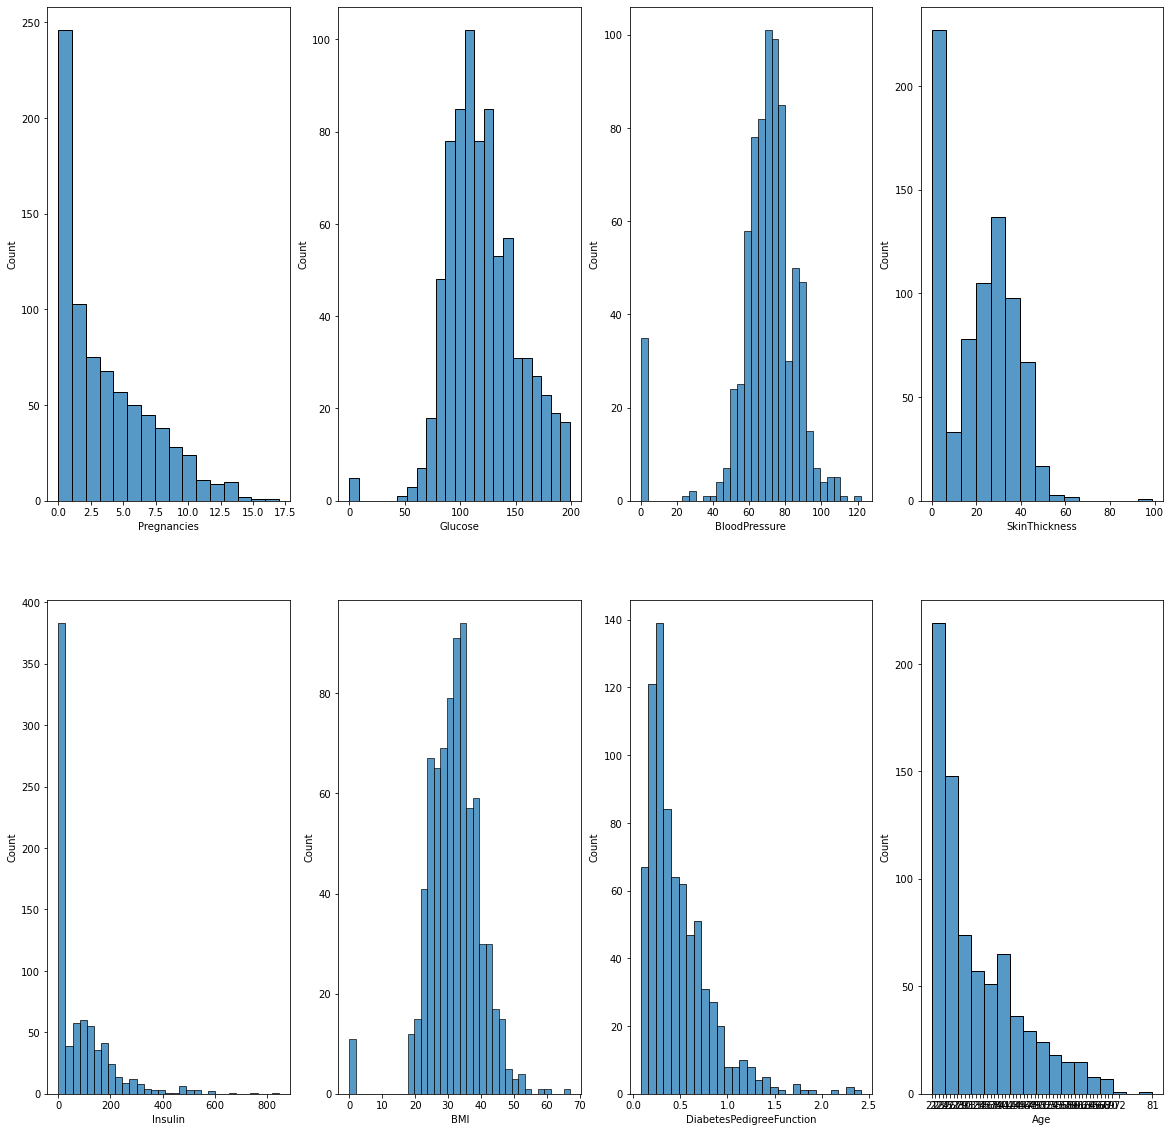

In [11]:
fig, axes = plt.subplots(2,4,figsize=(20,20))
i = 0
j = 0
for col in dataset.columns[:-1]:
    sns.histplot(x=dataset[col],ax=axes[i][j])
    plt.xticks(ticks=dataset[col].unique())
    
    j = j + 1
    
    if j >= 4:
        j = 0
        if i < 1:
            i = i + 1

## 10 Umur teratas yang menderita diabetes

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

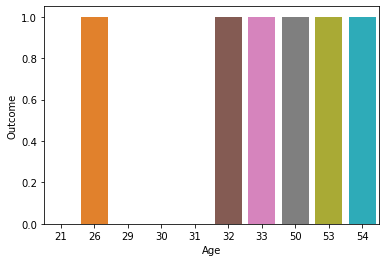

In [12]:
sns.barplot(x=dataset['Age'].head(10), y= dataset['Outcome']==1)

## 10 Umur teratas yang tidak menderita diabetes

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

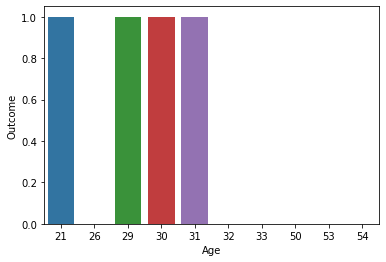

In [13]:
sns.barplot(x=dataset['Age'].head(10), y= dataset['Outcome']==0)

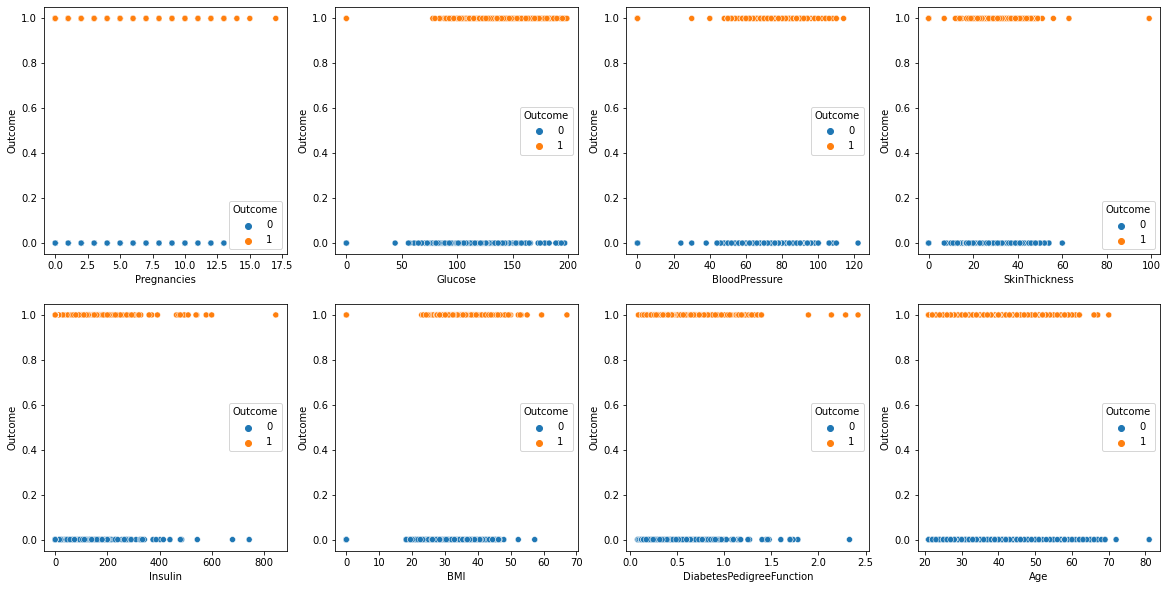

In [14]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in dataset.columns[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=dataset,hue='Outcome',ax=ax[i][j])    
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row

## Modeling

In [15]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [44]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
x_train=scaling_x.fit_transform(x_train)
x_test=scaling_x.transform(x_test)

In [45]:
model_rf = RandomForestClassifier(max_depth=20, random_state=0)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [46]:
model_rf.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [47]:
accuracy_train_rf = model_rf.score(x_train, y_train)
accuracy_test_rf  = model_rf.score(x_test, y_test)

In [48]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_rf * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_rf * 100,2)} %")

Akurasi Model (Train) : 100.0 %
Akurasi Model (Test)  : 81.17 %


In [49]:
y_pred = model_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[97 10]
 [19 28]]


In [50]:
target_names = ["Having Diabetes", "Not Having Diabetes"]
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

    Having Diabetes       0.84      0.91      0.87       107
Not Having Diabetes       0.74      0.60      0.66        47

           accuracy                           0.81       154
          macro avg       0.79      0.75      0.76       154
       weighted avg       0.81      0.81      0.81       154



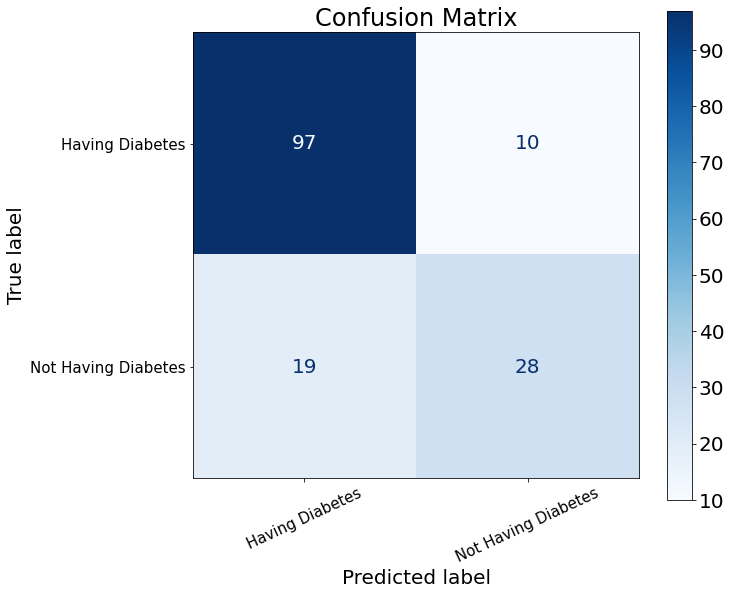

In [51]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_conf_matrix = ConfusionMatrixDisplay(cm, display_labels=target_names)


# Plotting Confusion Matrix
# Setting colour map to be used
display_conf_matrix.plot(cmap='Blues', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()

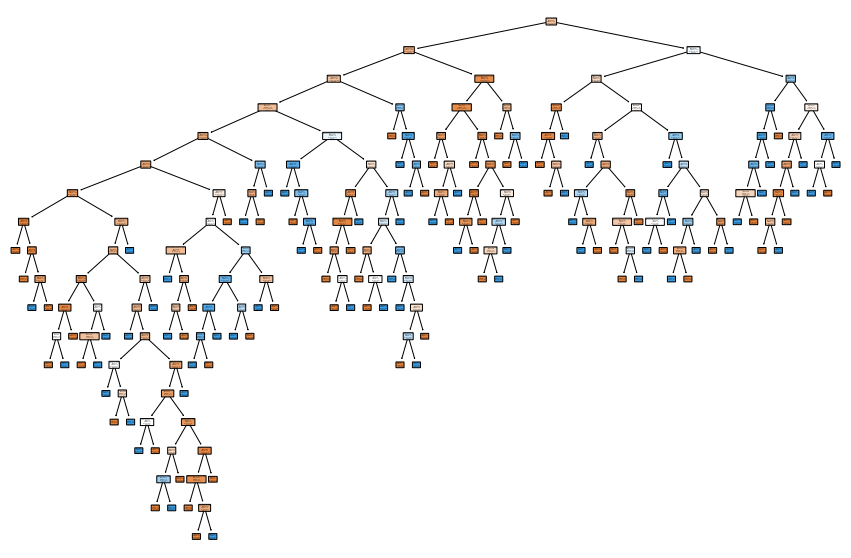

In [52]:
fig = plt.figure(figsize=(15, 10))
_ = plot_tree(model_rf.estimators_[10], 
          feature_names=dataset.columns[:-1],
          class_names=dataset.columns[-1], 
          filled=True, impurity=True, 
          rounded=True) # 10th tree in randomforest

In [53]:
df_test = pd.DataFrame(data={
    "Pregnancies/Kehamilan (Bulan)" : [0],
    "Glucose/Kadar Gula" : [1],
    "Blood Pressure/Tekanan Darah"  : [1],
    "Skin Thickness/Ketebalan Kulit"  : [100],
    "Insulin"  : [100],
    "BMI/indeks massa tubuh"  : [100],
    "Diabetes Pedigree Function"  : [100],
    "Age"  : [100],
})

df_test[0:1]

,Pregnancies/Kehamilan (Bulan),Glucose/Kadar Gula,Blood Pressure/Tekanan Darah,Skin Thickness/Ketebalan Kulit,Insulin,BMI/indeks massa tubuh,Diabetes Pedigree Function,Age
0,0,1,1,100,100,100,100,100


In [54]:
pred_test = model_rf.predict(df_test[0:1])
pred_test[0]

1

In [55]:
import joblib
joblib.dump((model_rf, scaling_x), "diabetes-classification-using-random-forest.pkl")

['diabetes-classification-using-random-forest.pkl']